<a href="https://colab.research.google.com/github/Risingresearchlab/Risingresearchlab/blob/main/Liver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving indian_liver_patient.csv to indian_liver_patient.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
df.isnull().values.any()

True

In [ ]:
#Count the number of Null values
df.isnull().values.sum()

4

In [ ]:
#Showing the null values as per attributes
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Albumin_and_Globulin_Ratio    4
dtype: int64

In [ ]:
# Showing Null Values
print(df[df.isnull().any(axis=1)][null_columns].head())

     Albumin_and_Globulin_Ratio
209                         NaN
241                         NaN
253                         NaN
312                         NaN


In [ ]:
# Filling null values with specific value
df['Albumin_and_Globulin_Ratio'].fillna(1,inplace=True)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.shape

(583, 11)

In [ ]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

1<-Normal
2<-Suspect
3<-Pathological

Separating the target and feature variables

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [ ]:
#use of mapping function
mapping = {'Male' :0 , 'Female' : 1 }
df['Gender'] = df['Gender'].map(mapping)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
x=df.drop (columns='Dataset', axis=1)
y=df['Dataset']
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


#Selecting features that have a greater than 10% correlation with the target variable


#standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
standardized_data=ss.transform(x)

In [ ]:
print(standardized_data)

[[ 1.25209764  1.76228085 -0.41887783 ...  0.29211961  0.19896867
  -0.14902528]
 [ 1.06663704 -0.56744644  1.22517135 ...  0.93756634  0.07315659
  -0.65177676]
 [ 1.06663704 -0.56744644  0.6449187  ...  0.47653296  0.19896867
  -0.18044725]
 ...
 [ 0.44843504 -0.56744644 -0.4027597  ... -0.0767071   0.07315659
   0.16519439]
 [-0.84978917 -0.56744644 -0.32216906 ...  0.29211961  0.32478075
   0.16519439]
 [-0.41704777 -0.56744644 -0.37052344 ...  0.75315299  1.58290153
   1.73629275]]


In [ ]:
x=standardized_data
y = df['Dataset']

#Train test splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=2)

**Naive** **Bayes**

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print('Classification Report of Naive Bayes:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))


Classification Report of Naive Bayes:
               precision    recall  f1-score   support

           1       0.94      0.41      0.57        83
           2       0.40      0.94      0.56        34

    accuracy                           0.56       117
   macro avg       0.67      0.68      0.56       117
weighted avg       0.78      0.56      0.57       117

Confusion Matrix:
 [[34 49]
 [ 2 32]]
Accuracy Score: 0.5641025641025641


Naive bayes Classifier Success Rate : 56.41%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


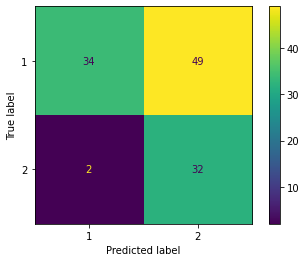

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)
p2=model.predict(x_test)
s2=accuracy_score(y_test,p2)
print("Naive bayes Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(model, x_test, y_test)
plt.show()

# Support Vector Machine

In [ ]:
# Support vector machine
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score


In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train) 
pred=clf.predict(x_test)
print('Classification Report of SVM:\n',classification_report(y_test, pred))
print(confusion_matrix(y_test,pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))

Classification Report of SVM:
               precision    recall  f1-score   support

      karpio       0.67      0.67      0.67         6
       katla       0.50      0.50      0.50        12
         koi       0.00      0.00      0.00         3
       magur       0.00      0.00      0.00         2
      pangas       0.56      0.88      0.68        16
       prawn       0.00      0.00      0.00         3
         rui       0.36      0.70      0.47        20
      shrimp       1.00      0.30      0.46        10
   silverCup       0.17      0.09      0.12        11
        sing       0.25      0.20      0.22        10
     tilapia       0.90      0.69      0.78        26

    accuracy                           0.52       119
   macro avg       0.40      0.37      0.36       119
weighted avg       0.54      0.52      0.49       119

[[ 4  0  0  0  0  0  0  0  0  1  1]
 [ 0  6  0  0  3  0  3  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  1]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support vector Classifier Success Rate : 44.54%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


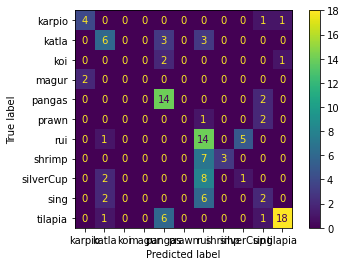

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
p2=model.predict(x_test)
s2=accuracy_score(y_test,p2)
print("Support vector Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

# K- Nearest Neighbors

In [ ]:
# KNN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred = knn.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[ 3,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  7,  1,  0,  1,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  1,  0,  0,  0,  1,  2],
       [ 0,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  1,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  2,  6,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  2,  0,  7,  0],
       [ 1,  0,  1,  0,  2,  0,  0,  0,  0,  0, 22]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=10)

In [ ]:
predictions = neigh.predict(x_test)
print('Classification Report of KNN:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Classification Report of KNN:
               precision    recall  f1-score   support

      karpio       0.57      0.67      0.62         6
       katla       0.62      0.83      0.71        12
         koi       0.00      0.00      0.00         3
       magur       0.00      0.00      0.00         2
      pangas       0.64      0.88      0.74        16
       prawn       0.33      0.33      0.33         3
         rui       0.84      0.80      0.82        20
      shrimp       0.64      0.90      0.75        10
   silverCup       0.71      0.45      0.56        11
        sing       0.44      0.40      0.42        10
     tilapia       0.95      0.77      0.85        26

    accuracy                           0.70       119
   macro avg       0.52      0.55      0.53       119
weighted avg       0.69      0.70      0.68       119

Confusion Matrix:
 [[ 4  0  0  1  0  0  0  0  0  0  1]
 [ 0 10  0  0  2  0  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  1  0  0]
 [ 2  0  0  0  0  0  0  0  0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


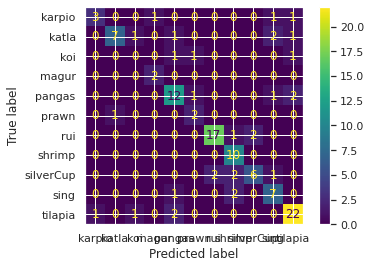

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train,y_train)
p5=model.predict(x_test)
s2=accuracy_score(y_test,p5)
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

Parameter tuning, Finding optimum parameters

# K-NN tuning

In [ ]:
import time
from sklearn.model_selection import GridSearchCV

params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

tic = time.time()

knn_gs = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
knn_gs_res = knn_gs.fit(x_train, y_train)
best_params = knn_gs_res.best_params_

print("Best score: ",knn_gs_res.best_score_)
print("Best parameters: ",best_params)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score:  0.7987046144749925
Best parameters:  {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
Total elapsed time: 2.498128890991211 seconds.


In [ ]:
knn = KNeighborsClassifier(**best_params)
knn.fit(x_train, y_train)

y_hat = knn.predict(x_train)
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

      karpio       1.00      0.67      0.80         6
       katla       1.00      0.83      0.91        12
         koi       0.00      0.00      0.00         3
       magur       0.67      1.00      0.80         2
      pangas       0.74      0.88      0.80        16
       prawn       0.40      0.67      0.50         3
         rui       1.00      0.95      0.97        20
      shrimp       0.91      1.00      0.95        10
   silverCup       1.00      0.91      0.95        11
        sing       0.75      0.90      0.82        10
     tilapia       0.96      0.88      0.92        26

    accuracy                           0.87       119
   macro avg       0.77      0.79      0.77       119
weighted avg       0.88      0.87      0.87       119

Training set accuracy:  0.9978813559322034
Test set accuracy:  0.865546218487395
[[ 4  0  0  1  0  0  0  0  0  1  0]
 [ 0 10  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  0  1

# Logistic Regression

In [ ]:
# Binomial_logistic_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import io


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)
 
predictions = logreg.predict(x_test)
print('Classification Report BLR:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))

Coefficients: [[-0.64247693 -1.27208062  1.74502918]
 [ 0.71977367  0.7410558  -1.74738934]
 [-1.30883607  0.88985831 -0.06321933]
 [-0.54958722 -0.39084352  1.53540805]
 [ 2.6481443   0.71847726 -2.19090785]
 [ 0.85800802  1.14448915  0.52002715]
 [-0.42776883  0.24646385 -1.06876925]
 [-0.63054761 -0.8978938   1.55406555]
 [-1.06233143 -0.05781982 -0.29436799]
 [-0.10446976  0.18891163  0.18648936]
 [ 0.50009187 -1.31061823 -0.17636551]]
Intercept: [-0.14326796  0.5601675  -1.53914173 -1.0859979  -0.65738775 -1.59122991
  1.20797964  0.53798846  0.40156559  0.84282867  1.4664954 ]
Classification Report BLR:
               precision    recall  f1-score   support

      karpio       0.75      0.50      0.60         6
       katla       0.00      0.00      0.00        12
         koi       0.00      0.00      0.00         3
       magur       0.00      0.00      0.00         2
      pangas       0.58      0.69      0.63        16
       prawn       0.00      0.00      0.00         3
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Linear Regression Success Rate : 40.34%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


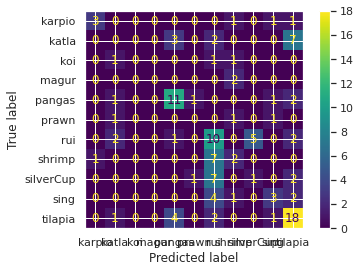

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
p1=logreg.predict(x_test)
s1=accuracy_score(y_test,p1)
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(logreg, x_test, y_test)
plt.show()


#LR tuning

In [ ]:
params ={'C':[0.001,0.01,0.1,1,10,100,1000],
      "penalty":["l1","l2"]} 

tic = time.time()

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,params,cv=10)
logreg_cv.fit(x_train,y_train)

best_params = logreg_cv.best_params_

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


Tuned hpyerparameters :(best parameters)  {'C': 100, 'penalty': 'l2'}
Accuracy : 0.4154255319148937
Total elapsed time: 2.090764284133911 seconds.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

In [ ]:
logreg = LogisticRegression(**best_params)
logreg.fit(x_train,y_train)
y_pred_test = logreg.predict(x_test)
print(classification_report(y_test, y_pred_test))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))


              precision    recall  f1-score   support

      karpio       0.75      0.50      0.60         6
       katla       0.00      0.00      0.00        12
         koi       0.00      0.00      0.00         3
       magur       0.00      0.00      0.00         2
      pangas       0.52      0.69      0.59        16
       prawn       0.00      0.00      0.00         3
         rui       0.30      0.55      0.39        20
      shrimp       0.29      0.20      0.24        10
   silverCup       0.17      0.09      0.12        11
        sing       0.50      0.40      0.44        10
     tilapia       0.61      0.65      0.63        26

    accuracy                           0.41       119
   macro avg       0.28      0.28      0.27       119
weighted avg       0.37      0.41      0.38       119

Test set accuracy:  0.4117647058823529
[[ 3  0  0  0  0  0  0  1  0  1  1]
 [ 0  0  0  0  4  0  5  0  0  0  3]
 [ 0  1  0  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0]
 [ 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# adaptive_boosting
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)
model = AdaModel.fit(x_train, y_train)

In [ ]:
predictions = AdaModel.predict(x_test)
print('Classification Report of AdaBoost:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))


Classification Report of AdaBoost:
               precision    recall  f1-score   support

      karpio       0.10      0.50      0.17         6
       katla       0.56      0.75      0.64        12
         koi       0.00      0.00      0.00         3
       magur       0.00      0.00      0.00         2
      pangas       0.00      0.00      0.00        16
       prawn       0.00      0.00      0.00         3
         rui       0.00      0.00      0.00        20
      shrimp       1.00      0.30      0.46        10
   silverCup       0.62      0.91      0.74        11
        sing       0.00      0.00      0.00        10
     tilapia       0.42      0.88      0.57        26

    accuracy                           0.40       119
   macro avg       0.25      0.30      0.23       119
weighted avg       0.30      0.40      0.30       119

Confusion Matrix:
 [[ 3  0  0  0  0  0  0  0  0  0  3]
 [ 3  9  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


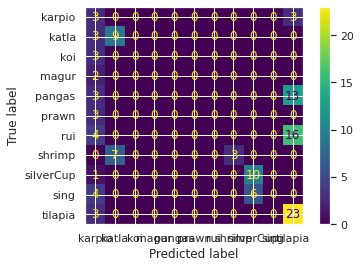

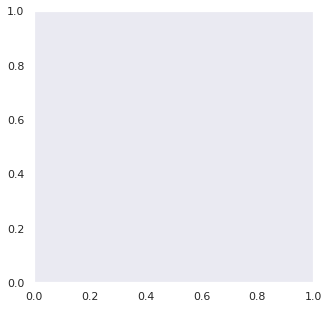

In [ ]:
AdaModel = AdaBoostClassifier(n_estimators=150,learning_rate=1)
AdaModel.fit(x_train,y_train)
p5=AdaModel.predict(x_test)
s2=accuracy_score(y_test,p5)
plot_confusion_matrix(AdaModel, x_test, y_test)
plt.figure(figsize=(5,5))
plt.grid(False)


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [ ]:
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      karpio       0.43      1.00      0.60         6
       katla       0.91      0.83      0.87        12
         koi       0.00      0.00      0.00         3
       magur       0.00      0.00      0.00         2
      pangas       0.81      0.81      0.81        16
       prawn       0.50      0.33      0.40         3
         rui       0.86      0.95      0.90        20
      shrimp       0.77      1.00      0.87        10
   silverCup       0.83      0.91      0.87        11
        sing       1.00      0.40      0.57        10
     tilapia       0.95      0.77      0.85        26

    accuracy                           0.78       119
   macro avg       0.64      0.64      0.61       119
weighted avg       0.81      0.78      0.78       119


Accuracy: 0.7815
Confusion Matrix:
 [[ 6  0  0  0  0  0  0  0  0  0  0]
 [ 1 10  1  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  1]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 1  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


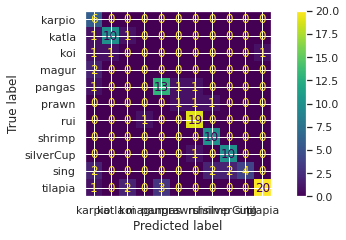

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf.fit(x_train,y_train)
p5=rf.predict(x_test)
s2=accuracy_score(y_test,p5)
plot_confusion_matrix(rf, x_test, y_test)
plt.show()

# DTC/CART/J48

In [ ]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier()
drugTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred  = drugTree.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
predictions = drugTree.predict(x_test)
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

      karpio       0.57      0.67      0.62         6
       katla       0.86      1.00      0.92        12
         koi       0.00      0.00      0.00         3
       magur       0.00      0.00      0.00         2
      pangas       0.78      0.88      0.82        16
       prawn       1.00      0.33      0.50         3
         rui       0.95      0.95      0.95        20
      shrimp       1.00      1.00      1.00        10
   silverCup       0.83      0.91      0.87        11
        sing       0.73      0.80      0.76        10
     tilapia       0.92      0.85      0.88        26

    accuracy                           0.84       119
   macro avg       0.69      0.67      0.67       119
weighted avg       0.83      0.84      0.83       119


Accuracy: 0.8403
Confusion Matrix:
 [[ 4  0  0  1  0  0  1  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  1  0  1]
 [ 2  0  0  0  0  0  0  0  0  0  0]
 [ 1  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


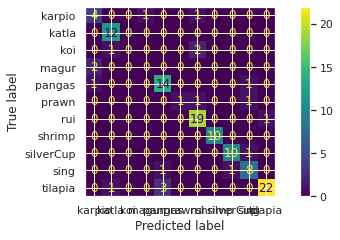

In [ ]:
drugTree = DecisionTreeClassifier()
drugTree.fit(x_train,y_train)
p5=drugTree.predict(x_test)
s2=accuracy_score(y_test,p5)
plot_confusion_matrix(drugTree, x_test, y_test)
plt.show()

#GBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gradient_booster.fit(x_train,y_train)
print(classification_report(y_test,gradient_booster.predict(x_test)))

              precision    recall  f1-score   support

      karpio       0.50      0.50      0.50         6
       katla       0.83      0.83      0.83        12
         koi       0.50      0.67      0.57         3
       magur       0.00      0.00      0.00         2
      pangas       0.70      0.88      0.78        16
       prawn       0.25      0.33      0.29         3
         rui       0.95      0.95      0.95        20
      shrimp       1.00      1.00      1.00        10
   silverCup       1.00      0.91      0.95        11
        sing       0.89      0.80      0.84        10
     tilapia       1.00      0.88      0.94        26

    accuracy                           0.84       119
   macro avg       0.69      0.70      0.70       119
weighted avg       0.85      0.84      0.84       119



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


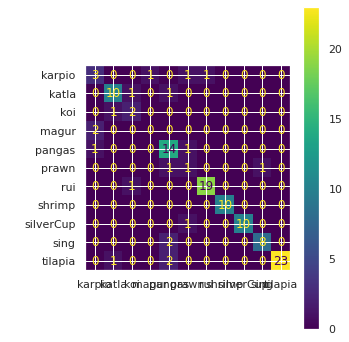

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(x_train,y_train)
p5=gradient_booster.predict(x_test)
s2=accuracy_score(y_test,p5)
matrix= plot_confusion_matrix(gradient_booster, x_test, y_test)
matrix.ax_.set_title('Confusion Matrix', color='white')
plt.xlabel('Predicted label', color='white')
plt.ylabel('True labe', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(5,5)
plt.show()